In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
dataset_targets = {
    "depression\depression_transformed.csv": "Chronic Medical Conditions",
    "diabetes\diabetes_transformed.csv": "diabetes",
    "loan\loan_transformed.csv": "charged_off",
    "weather\weather_transformed.csv": "RainTomorrow"
}

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\alapr\AppData\Local\Temp\ipykernel_36032\1205409502.py:2: SyntaxWarning: invalid escape sequence '\d'
  "depression\depression_transformed.csv": "Chronic Medical Conditions",
C:\Users\alapr\AppData\Local\Temp\ipykernel_36032\1205409502.py:3: SyntaxWarning: invalid escape sequence '\d'
  "diabetes\diabetes_transformed.csv": "diabetes",
C:\Users\alapr\AppData\Local\Temp\ipykernel_36032\1205409502.py:4: SyntaxWarning: invalid escape sequence '\l'
  "loan\loan_transformed.csv": "charged_off",
C:\Users\alapr\AppData\Local\Temp\ipykernel_36032\1205409502.py:5: SyntaxWarning: invalid escape 

In [17]:
(list(dataset_targets.keys()))[0]

'depression\\depression_transformed.csv'

In [3]:
def load_and_split(path, target_name, test_size=0.2, random_state=42):
    data = pd.read_csv(path)
    X=  data.drop(columns=[target_name])
    y = data[target_name]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
X_train, X_test, y_train, y_test = load_and_split(list(dataset_targets.keys())[2], dataset_targets[list(dataset_targets.keys())[2]])

In [18]:
X_train1, X_test1, y_train1, y_test1 = load_and_split(list(dataset_targets.keys())[1], dataset_targets[list(dataset_targets.keys())[1]])

In [19]:
X_train3, X_test3, y_train3, y_test3 = load_and_split(list(dataset_targets.keys())[3], dataset_targets[list(dataset_targets.keys())[3]])

In [20]:
X_train0, X_test0, y_train0, y_test0 = load_and_split(list(dataset_targets.keys())[0], dataset_targets[list(dataset_targets.keys())[0]])

In [ ]:
#model
model1 = GradientBoostingClassifier(random_state=42)
model2 = RandomForestClassifier(random_state=42)
model3 = LogisticRegression(random_state=42)

In [ ]:
#siatka parametrów
logistic_param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['elasticnet'],
    'l1_ratio': np.linspace(0, 1, 10),
    'solver': ['saga'],
    'max_iter': [1000, 2000, 5000]
}

gradient_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

forest_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [12]:
#wykresy porównawcze tunowalności
def plot_tunability(model, param_grid, X_train, y_train, scoring='f1_macro', random_iter=30, bayes_iter=30, cv=5, random_state=42):
   
    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=random_iter,
        cv=cv,
        random_state=random_state,
        scoring=scoring,
        n_jobs=-1,
        verbose=1
    )
    random_search.fit(X_train, y_train)
    rs_scores = random_search.cv_results_['mean_test_score']
    rs_best = np.maximum.accumulate(rs_scores) if scoring != 'f1_makro' else np.minimum.accumulate(rs_scores)

    # BayesSearchCV
    bayes_search = BayesSearchCV(
        estimator=model,
        search_spaces=param_grid,
        n_iter=bayes_iter,
        cv=cv,
        random_state=random_state,
        scoring=scoring,
        n_jobs=-1,
        verbose=1
    )
    bayes_search.fit(X_train, y_train)
    bs_scores = bayes_search.cv_results_['mean_test_score']
    bs_best = np.maximum.accumulate(bs_scores) if scoring != 'neg_mean_squared_error' else np.minimum.accumulate(bs_scores)
    # Wykres porównawczy tunowalności
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, random_iter + 1), rs_best, label='RandomizedSearchCV', marker='o')
    plt.plot(range(1, bayes_iter + 1), bs_best, label='BayesSearchCV', marker='x')
    plt.title('Porównanie tunowalności RandomizedSearchCV i BayesSearchCV')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Średni wynik testu')
    plt.legend()
    plt.grid()
    plt.show()  
    return random_search, bayes_search

Dla zbioru 2

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5

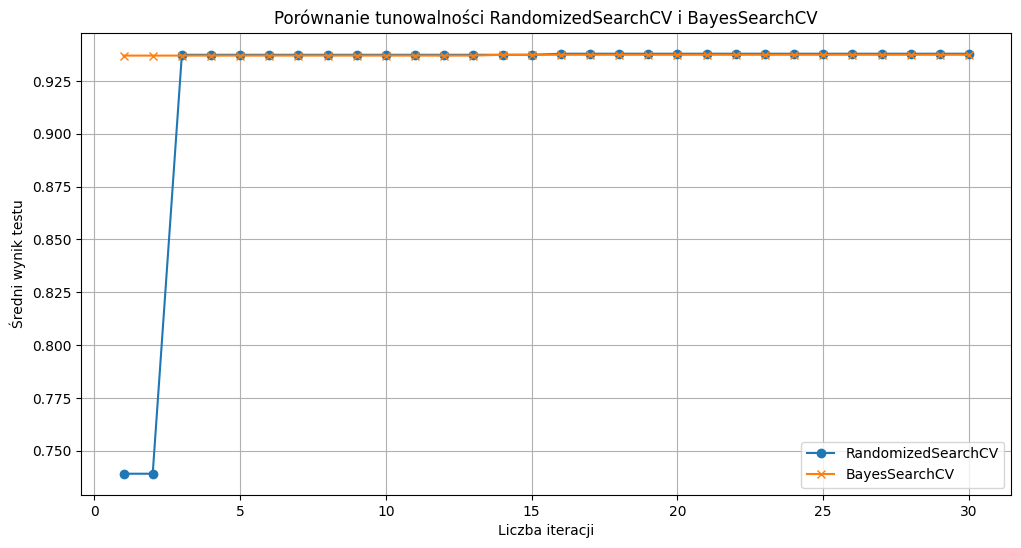

In [ ]:
random_search1, bayes_search1 = plot_tunability(model1, gradient_param_grid, X_train, y_train) # nazwy używane później: random_search1_2, bayes_search1_2

In [21]:
random_search1_2, bayes_search1_2 = random_search1, bayes_search1

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5

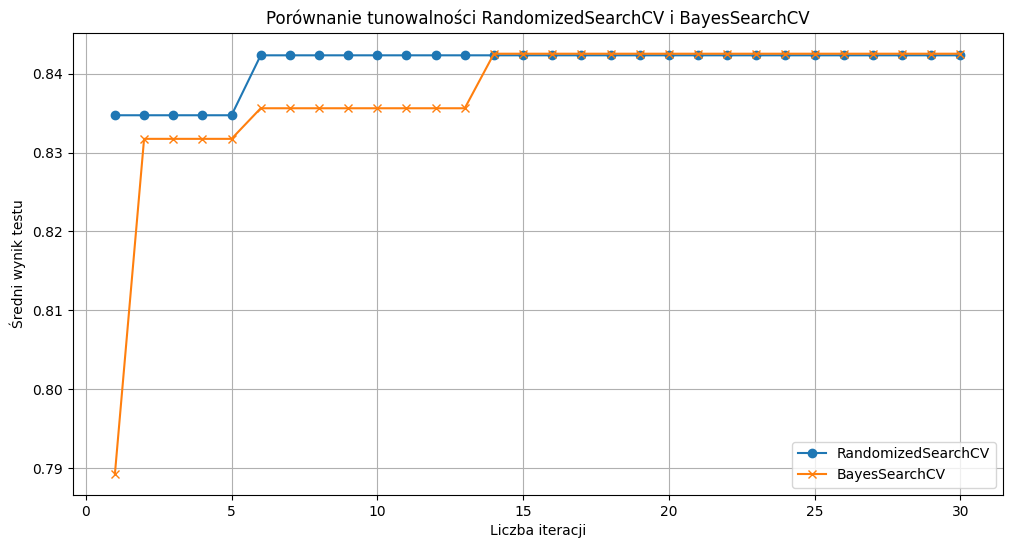

In [ ]:
random_search2, bayes_search2 = plot_tunability(model2, forest_param_grid, X_train, y_train) # nazwy używane później: random_search2_2, bayes_search2_2

In [22]:
random_search2_2, bayes_search2_2 = random_search2, bayes_search2

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5

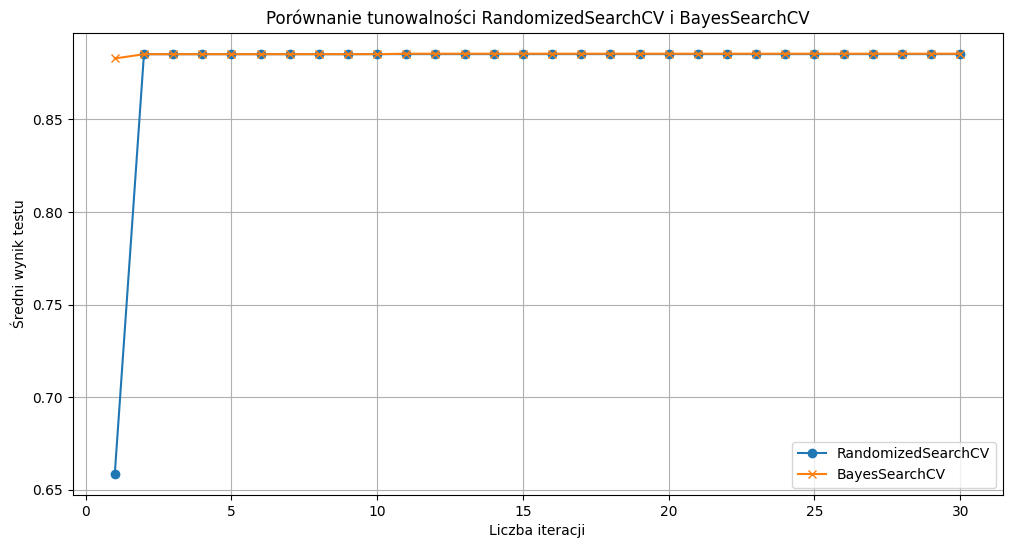

In [ ]:
random_search3, bayes_search3 = plot_tunability(model3, logistic_param_grid, X_train, y_train) #nazwy używane później: random_search3_2, bayes_search3_2

In [23]:
random_search3_2, bayes_search3_2 = random_search3, bayes_search3

Dla zbioru 0:

In [24]:
random_search1_0, bayes_search1_0 = plot_tunability(model1, gradient_param_grid, X_train0, y_train0)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: 

In [ ]:
random_search2_0, bayes_search2_0 = plot_tunability(model2, forest_param_grid, X_train0, y_train0)

In [ ]:
random_search3_0, bayes_search3_0 = plot_tunability(model3, logistic_param_grid, X_train0, y_train0)

Dla zbioru 1:

In [ ]:
random_search1_1, bayes_search1_1 = plot_tunability(model1, gradient_param_grid, X_train1, y_train1)

In [ ]:
random_search2_1, bayes_search2_1 = plot_tunability(model2, forest_param_grid, X_train1, y_train1)

In [ ]:
random_search3_1, bayes_search3_1 = plot_tunability(model3, logistic_param_grid, X_train1, y_train1)

Dla zbioru 3:

In [ ]:
random_search1_3, bayes_search1_3 = plot_tunability(model1, gradient_param_grid, X_train3, y_train3)

In [ ]:
random_search2_3, bayes_search2_3 = plot_tunability(model2, forest_param_grid, X_train3, y_train3)

In [ ]:
random_search3_3, bayes_search3_3 = plot_tunability(model3, logistic_param_grid, X_train3, y_train3)